<a href="https://colab.research.google.com/github/dudubouneto/Disc_FluxoVacinacao/blob/main/NumHospitais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recomendação OMS: 2 hospitais para 1000 habitantes (https://setorsaude.com.br/dicas/cenario-dos-hospitais-no-brasil-2019/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Discretização das variáveis/Data/final_novo_ibge_sp - final_novo_ibge_sp_cpy.csv')

In [5]:
data = data[['Município', 'Codigo_IBGE', 'Hospitais']]
data.head()

,Município,Codigo_IBGE,Hospitais
0,ADAMANTINA,3500105,0
1,ADOLFO,3500204,0
2,AGUAÍ,3500303,0
3,ÁGUAS DA PRATA,3500402,0
4,ÁGUAS DE LINDÓIA,3500501,0


In [6]:
data['Hospitais'].describe()

count    645.000000
mean       0.421705
std        2.706473
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       65.000000
Name: Hospitais, dtype: float64

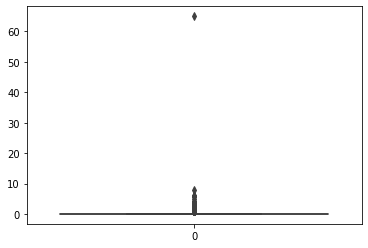

In [19]:
sns.boxplot(data=data['Hospitais'])

Vamos retirar todos os valores "0" e analisar novamente a distribuição por quartis:

In [18]:
semZeros = data[data['Hospitais'] > 0]
semZeros['Hospitais'].describe()

count    112.000000
mean       2.428571
std        6.130289
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       65.000000
Name: Hospitais, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


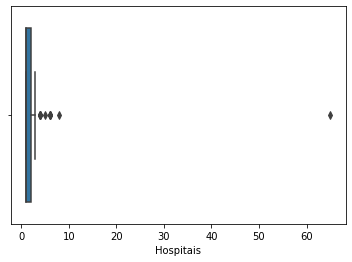

In [12]:
sns.boxplot(semZeros['Hospitais'])

##Proposta de distribuição
* 0 Hospitais: 'Nenhum Hospital'
* 1 Hospital (até a mediana): 'Baixo'
* Até o terceiro quartil (2 hospitais): 'Médio'
* Até o limite superior: 'Alto'
* Outliers: 'Muito Alto'

In [13]:
IQR = semZeros['Hospitais'].quantile(.75) - semZeros['Hospitais'].quantile(.25)
sup = semZeros['Hospitais'].quantile(.75) + 1.5 * IQR

In [16]:
bins = [-1, 0, 1, semZeros['Hospitais'].quantile(.75), sup, data['Hospitais'].max()]
labels = ['Nenhum Hospital', 'Baixo', 'Médio', 'Alto', 'Muito Alto']
data['Classificação #Hospitais'] = pd.cut(data['Hospitais'], bins=bins, labels=labels)
data

,Município,Codigo_IBGE,Hospitais,Classificação #Hospitais
0,ADAMANTINA,3500105,0,Nenhum Hospital
1,ADOLFO,3500204,0,Nenhum Hospital
2,AGUAÍ,3500303,0,Nenhum Hospital
3,ÁGUAS DA PRATA,3500402,0,Nenhum Hospital
4,ÁGUAS DE LINDÓIA,3500501,0,Nenhum Hospital
...,...,...,...,...
640,VOTORANTIM,3557006,1,Baixo
641,VOTUPORANGA,3557105,0,Nenhum Hospital
642,ZACARIAS,3557154,0,Nenhum Hospital
643,CHAVANTES,3557204,0,Nenhum Hospital


###Histograma da distribuição

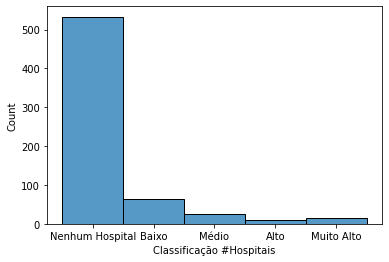

In [22]:
sns.histplot(data['Classificação #Hospitais'])